In [1]:
#!/usr/bin/env python
%matplotlib inline  

#makes AMP module reload
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd
from scipy.stats import pearsonr,spearmanr

#pull in the classes to do the sims!
import AMPmodule

import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots



ppt: 1 , exposed: 50 , transmission ratio (conc/IC50): 1e-10
breakthrough: 60.76999999999786


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


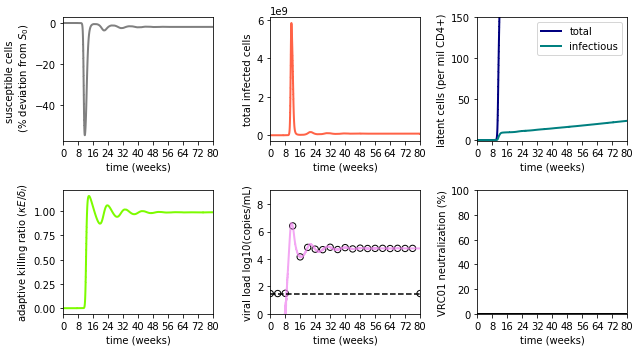

In [2]:
#simple tests for single participant without VRC01, infected on day 50

VD=np.array(pd.read_csv('data/viral_dynamics.csv',usecols=range(1,8)))

vdset=4 #pick the viral dynamics set

p1=AMPmodule.participant(name=1, et=50, tF=560, stop2=False, 
                         A0=1, vdp=VD[vdset,:], pkp=[1e-5,0,0,0], pdp=[1e5,1], v_flg=True)

t,sol=p1.vd_sim()
tAb = np.linspace(0,560,1e3) #time for antibody dose

AMPmodule.simplot(t,sol,tAb,p1,'sto_model-natural')


ppt: 1 , exposed: 50 , transmission ratio (conc/IC50): 3.7517561350643174
clearance: 52.089999999999584


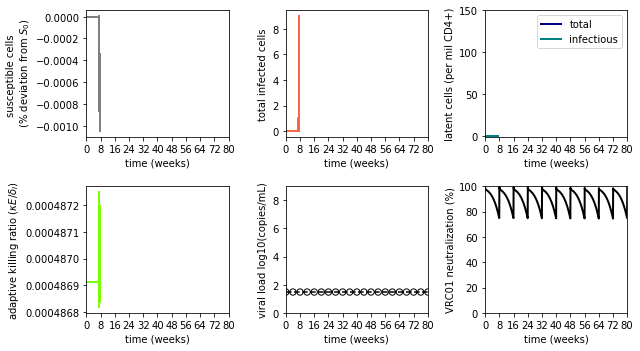

In [3]:
#simple tests for single participant with VRC01

PK=np.array(pd.read_csv('data/PK10.csv',usecols=range(1,5)))
PD=np.array(pd.read_csv('data/PDall.csv',usecols=range(1,3)))

vdset=4 #pick the viral dynamics set
pkset=2
pdset=93

p2=AMPmodule.participant(name=1, et=50, tF=560, stop2=False, 
                         A0=1, vdp=VD[vdset,:], pkp=PK[pkset,:], pdp=PD[pdset,:], v_flg=True)

t,sol=p2.vd_sim()
AMPmodule.simplot(t,sol,tAb,p2,'sto_model-VRC01')



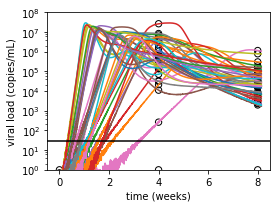

In [4]:
#try all viral dynamics parameter sets without VRC01 in a single dose interval

etf=0 #how to space out for plotting
plt.figure(figsize=(4,3))
for i in range(len(VD)):
    p=AMPmodule.participant(name=1, et=i*etf, tF=8*7+1, stop2=False, A0=1, 
                  vdp=VD[i,:], pkp=[1e-5,0,0,0], pdp=[1e5,1], v_flg=False)

    t,sol=p.vd_sim()
    plt.semilogy(t/7,sol[:,6]/p.vol*1e3)
    plt.scatter(p.obs_times/7,p.obs+0.7**i,facecolors='none',edgecolors='k',s=40)

plt.xlabel('time (weeks)')
plt.ylabel('viral load (copies/mL)')
plt.ylim([1,1e8])
plt.yticks(np.logspace(0,8,9))
plt.axhline(30,color='k')
plt.tight_layout()
plt.xlim([-0.5,8.5])

plt.tight_layout()
plt.savefig('figures/sto_model-natural_all.pdf',dpi=600)


name: 0 conc ratio: 1e-10 first pos time: 0 first pos VL: 0
name: 1 conc ratio: 1e-10 first pos time: 308.0071421085583 first pos VL: 318045.15133
name: 2 conc ratio: 1e-10 first pos time: 504.00744709037394 first pos VL: 111.59392
name: 3 conc ratio: 1e-10 first pos time: 392.0084771561714 first pos VL: 17522730.12537
name: 4 conc ratio: 1e-10 first pos time: 308.00976599118263 first pos VL: 12586344.25188
name: 5 conc ratio: 1e-10 first pos time: 224.003161865581 first pos VL: 212070.39379
name: 6 conc ratio: 1e-10 first pos time: 532.0046953309311 first pos VL: 7106671.076669999
name: 7 conc ratio: 1e-10 first pos time: 168.00257876837784 first pos VL: 110695.02346
name: 8 conc ratio: 1e-10 first pos time: 308.0055456690985 first pos VL: 1568509.69733
name: 9 conc ratio: 1e-10 first pos time: 84.00128179401014 first pos VL: 13224508.895909999
name: 10 conc ratio: 1e-10 first pos time: 168.00095194876104 first pos VL: 828615.12757
name: 11 conc ratio: 1e-10 first pos time: 252.002368

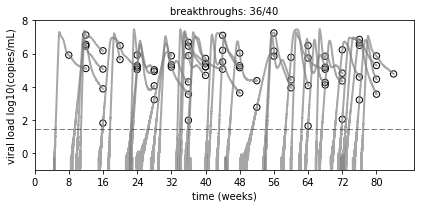

In [5]:
#now simple test of contrl trial in 

#%time 
tr=AMPmodule.trial(name='test', nps=40, tF=560, dose=0, clade='B', 
                   rfrac=0, A0=1, iv_phi=1, maxIC50=50, 
                   v_flg=True, keep_flg=2)

#plot trial outcome
plt.figure(figsize=(6,3))
for ip in range(tr.nps):
    plt.scatter(tr.obz[0][ip][tr.obz[1][ip]>30]/7,
                np.log10(tr.obz[1][ip][tr.obz[1][ip]>30]),
                facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    plt.plot(tr.sim[0][ip][tr.sim[1][ip]>-3]/7,
             tr.sim[1][ip][tr.sim[1][ip]>-3],
             lw=2,color='gray',alpha=0.7)    

plt.axhline(np.log10(30),color='k',ls='--',lw=0.5)
plt.ylim([-1,8])
plt.ylabel('viral load log10(copies/mL)')
plt.xlabel('time (weeks)')
plt.xticks(range(0,82,8))#,fontsize=8)
plt.title('breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps),fontsize=10)
#plt.legend(['breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps)],fontsize=10)
plt.tight_layout()
plt.savefig('figures/trial_ctltest.pdf',dpi=600)

name: 0 conc ratio: 10.205473869491486 first pos time: 0 first pos VL: 0
name: 1 conc ratio: 5.977406223043747 first pos time: 0 first pos VL: 0
name: 2 conc ratio: 9.132569992483987 first pos time: 0 first pos VL: 0
name: 3 conc ratio: 143.02238666407317 first pos time: 0 first pos VL: 0
name: 4 conc ratio: 17.073073092553106 first pos time: 0 first pos VL: 0
name: 5 conc ratio: 0.04191187095836077 first pos time: 504.00025923409163 first pos VL: 418268.10877000005
name: 6 conc ratio: 174.679025531378 first pos time: 0 first pos VL: 0
name: 7 conc ratio: 10.974315096278922 first pos time: 0 first pos VL: 0
name: 8 conc ratio: 40.71229455186371 first pos time: 0 first pos VL: 0
name: 9 conc ratio: 0.6711762333515225 first pos time: 84.0015365321721 first pos VL: 259.58287
name: 10 conc ratio: 82.65380941653207 first pos time: 0 first pos VL: 0
name: 11 conc ratio: 0.1607731622554315 first pos time: 560.007113197143 first pos VL: 999159.26267
name: 12 conc ratio: 1.3760647473585506 firs

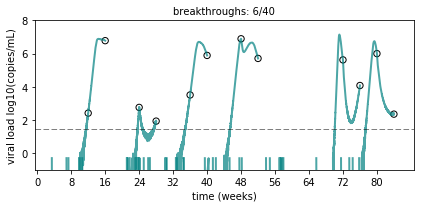

In [6]:
#now simple test of trial including VRC01
%time tr=AMPmodule.trial(name='test', nps=40, tF=560, dose=10, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=True, keep_flg=2)

#plot trial outcome
plt.figure(figsize=(6,3))
for ip in range(tr.nps):
    plt.scatter(tr.obz[0][ip][tr.obz[1][ip]>30]/7,
                np.log10(tr.obz[1][ip][tr.obz[1][ip]>30]),
                facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    #plt.scatter(tr.obz[0][ip]/7,np.log10(tr.obz[1][ip]+4e-4*1.1**ip),facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    plt.plot(tr.sim[0][ip][tr.sim[1][ip]>-3]/7,
             tr.sim[1][ip][tr.sim[1][ip]>-3],
             lw=2,color='teal',alpha=0.7)    

plt.axhline(np.log10(30),color='k',ls='--',lw=0.5)
plt.xticks(range(0,82,8))#,fontsize=8)
plt.ylim([-1,8])
plt.ylabel('viral load log10(copies/mL)')
plt.xlabel('time (weeks)')
plt.title('breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps),fontsize=10)
plt.tight_layout()
plt.savefig('figures/trial_10test.pdf',dpi=600)

name: 0 conc ratio: 609.1050280243537 first pos time: 0 first pos VL: 0
name: 1 conc ratio: 0.6599025043885787 first pos time: 392.00088952386756 first pos VL: 361298.67729
name: 2 conc ratio: 192.3029713379685 first pos time: 0 first pos VL: 0
name: 3 conc ratio: 39.763801576779535 first pos time: 0 first pos VL: 0
name: 4 conc ratio: 0.6513235721295335 first pos time: 0 first pos VL: 0
name: 5 conc ratio: 379.75616655317225 first pos time: 0 first pos VL: 0
name: 6 conc ratio: 138.07360753004048 first pos time: 0 first pos VL: 0
name: 7 conc ratio: 54.70728291379909 first pos time: 0 first pos VL: 0
name: 8 conc ratio: 0.9459336599849337 first pos time: 0 first pos VL: 0
name: 9 conc ratio: 537.8734089867653 first pos time: 0 first pos VL: 0
name: 10 conc ratio: 0.2395455757750549 first pos time: 504.004627762062 first pos VL: 30.09045
name: 11 conc ratio: 79.93327275924507 first pos time: 0 first pos VL: 0
name: 12 conc ratio: 9.890033366991625 first pos time: 0 first pos VL: 0
name

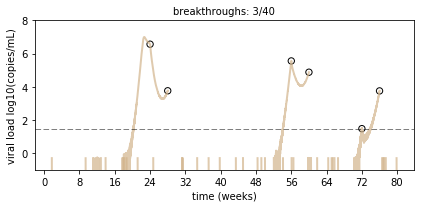

In [7]:
#now simple test of trial including VRC01
%time tr=AMPmodule.trial(name='test', nps=40, tF=560, dose=30, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=True, keep_flg=2)

#plot trial outcome
plt.figure(figsize=(6,3))
for ip in range(tr.nps):
    plt.scatter(tr.obz[0][ip][tr.obz[1][ip]>30]/7,
                np.log10(tr.obz[1][ip][tr.obz[1][ip]>30]),
                facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    #plt.scatter(tr.obz[0][ip]/7,np.log10(tr.obz[1][ip]+4e-4*1.1**ip),facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    plt.plot(tr.sim[0][ip][tr.sim[1][ip]>-3]/7,
             tr.sim[1][ip][tr.sim[1][ip]>-3],
             lw=2,color='tan',alpha=0.7)
    
plt.axhline(np.log10(30),color='k',ls='--',lw=0.5)
plt.xticks(range(0,82,8))#,fontsize=8)
plt.ylim([-1,8])
plt.ylabel('viral load log10(copies/mL)')
plt.xlabel('time (weeks)')
plt.title('breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps),fontsize=10)
plt.tight_layout()
plt.savefig('figures/trial_30test.pdf',dpi=600)

In [15]:
#compute predicted Panglossian PE

#clade B trial, 100 repeats
Bpl=AMPmodule.trial(name='test', nps=4000, tF=560, dose=0, clade='B', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
B10=AMPmodule.trial(name='test', nps=4000, tF=560, dose=10, clade='B', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
B30=AMPmodule.trial(name='test', nps=4000, tF=560, dose=30, clade='B', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)

print('PE10',1-sum(B10.brks>0)/sum(Bpl.brks>0))
print('PE30',1-sum(B30.brks>0)/sum(Bpl.brks>0))
      


PE10 0.9408524209915917
PE30 0.9625978544505653


In [14]:
#clade C trial, 100 repeats
Cpl=AMPmodule.trial(name='test', nps=4000, tF=560, dose=0, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
C10=AMPmodule.trial(name='test', nps=4000, tF=560, dose=10, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
C30=AMPmodule.trial(name='test', nps=4000, tF=560, dose=30, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)

print('PE10',1-sum(C10.brks>0)/sum(Cpl.brks>0))
print('PE30',1-sum(C30.brks>0)/sum(Cpl.brks>0))


PE10 0.8781812982556477
PE30 0.9385187303402917
